In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time

In [3]:
# Decorador per mesurar el temps d'execució. S'utilitza posant @time_it a sobre de la funció.
def time_it(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()  
        result = func(*args, **kwargs)  
        end_time = time.time()  
        execution_time = end_time - start_time 
        print(f"Temps d'execució de la funció {func.__name__}: {execution_time:.4f} segons")
        return result  
    return wrapper

In [99]:
file = "dataset.csv"
dataset = pd.read_csv(file)
print(dataset.head())

   id  age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0   2   18     1    1    120     1    0      56       3     0    88        62   
1   4   26     4    1      1     1    0      20       4     0   109        55   
2   9   21     3    2      1     0    0      36       3     0   106        64   
3  10   21     2    2      1     0    1      51       5     0   101        52   
4  13   21     3    1      1     1    0      22       4     0   102        58   

   qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  
0        27    17   0.738095    34      61      17      13      20  
1        37    22   0.690476     7      33      14      11      26  
2        39    17   0.690476    25      73      24       7      23  
3        33    18   0.833333    17      48      16      10      21  
4        28    21   0.690476    14      46      22      14      23  


Eliminem la columna de id ja que no té cap rellevància en la qüestió. També treiem la columna amsp ja que no entenem que representa. 

In [100]:
df = dataset.drop(['id', 'amsp'], axis=1)


Separem entre variables numèriques, categòriques i treiem les columnes de cesd (depressió), stai_t (ansietat), 

In [101]:
df_cat_order = df[['year', 'stud_h', 'health']]
df_cat_norder = df[['glang','sex']]
# df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]
df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'mbi_ea']]
df_bin = df[['part', 'job', 'psyt']]

# df_cat = df[['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']]
# df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean']]

vars_categoriques = ['year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']
vars_num = ['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']
vars_bin = ['part', 'job', 'psyt']

In [102]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_cat_order_c = df_cat_order.copy()
df_cat_norder_c = df_cat_norder.copy()
df_num_c = df_num.copy()
df_bin_c = df_bin.copy()

df_cat_norder_encoded = pd.get_dummies(df_cat_norder_c, columns=['glang', 'sex'], prefix=['glang', 'sex'])

scaler = StandardScaler()
# scaler2 = MinMaxScaler()
scaler2 = StandardScaler()

df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num_c), columns=df_num_c.columns)
df_cat_order_scaled = pd.DataFrame(scaler2.fit_transform(df_cat_order_c), columns=df_cat_order_c.columns)


df_final = pd.concat([df_cat_order_scaled, df_cat_norder_encoded, df_num_scaled, df_bin_c], axis=1)


pd.set_option('display.max_columns', None)


bool_columns = df_final.select_dtypes(include='bool').columns

for col in bool_columns:
    df_final[col] = df_final[col].astype(int)

df_final.head()

# pd.reset_option('display.max_columns')

,year,stud_h,health,glang_1,glang_15,glang_20,glang_37,glang_54,glang_60,glang_63,glang_90,glang_92,glang_95,glang_98,glang_102,glang_104,glang_106,glang_108,glang_114,glang_118,glang_120,glang_121,sex_1,sex_2,sex_3,age,jspe,qcae_cog,qcae_aff,erec_mean,mbi_ea,part,job,psyt
0,-1.192728,1.929222,-0.733013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,-1.328891,-2.093018,0.529045,-1.448527,0.191956,-0.908577,1,0,0
1,0.508974,-0.332243,0.209584,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.096233,0.299039,-0.536951,0.412275,-0.317245,0.387023,1,0,0
2,-0.058260,0.672852,-0.733013,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.419470,-0.042683,0.833615,0.784435,-0.317245,-0.260777,0,0,0
3,-0.625494,1.615130,1.152182,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.419470,-0.612221,-0.993806,-0.332046,1.210356,-0.692644,0,1,0
4,-0.058260,-0.206606,0.209584,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.419470,-0.498313,-0.080096,-1.262447,-0.317245,-0.260777,1,0,0


In [103]:
df.shape, df_final.shape

((886, 18), (886, 34))

In [9]:
df_max_scaled = df.copy() 
  
# apply normalization techniques 
for column in df_max_scaled.columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 

In [10]:
df_min_max_scaled = df.copy() 
  
# apply normalization techniques 
for column in df_min_max_scaled.columns: 
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

# Clustering

Millor K elbow: 2
Millor k silhouette: 3


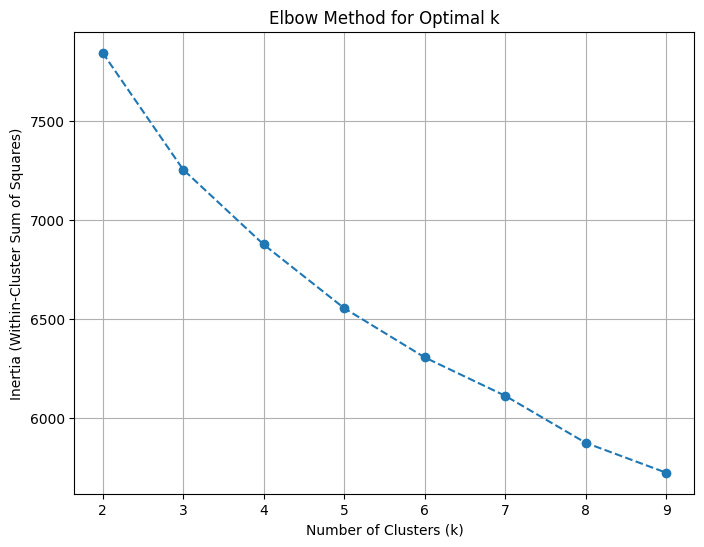

In [106]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def kmeans(dfs, max_k=10):
    df_t = dfs.copy()

    # Store inertia values and clustering results for plotting
    inertia = []
    clusterings = []

    sil_best_score = -1
    sil_best_k = 2

    for k in range(2, max_k + 1):
        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        clusters = model.fit_predict(df_t)
        
        # Silhouette
        if k > 2:
            score = silhouette_score(df_t, clusters)
            if score > sil_best_score:
                sil_best_score = score
                sil_best_k = k
            ##


        inertia.append(model.inertia_)
        cluster_centers = model.cluster_centers_
        clusterings.append((k, clusters, cluster_centers))

    # Silhouette 
    print("Millor k silhouette:", sil_best_k)

    # Plot clustering results for each k, 2 plots per row
    num_plots = len(clusterings)
    num_cols = 2

    plt.figure(figsize=(8, 6))
    k_values = range(2, max_k + 1)
    plt.plot(k_values, inertia, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
    plt.title('Elbow Method for Optimal k')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()
    
    return clusterings
    

c = kmeans(df_final, 9)

<Figure size 1200x800 with 0 Axes>

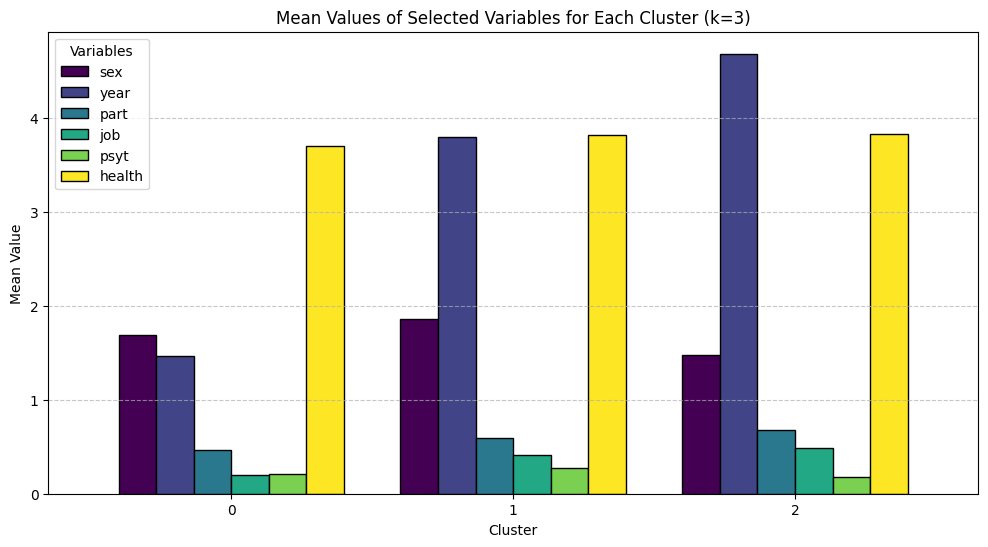

<Figure size 1200x800 with 0 Axes>

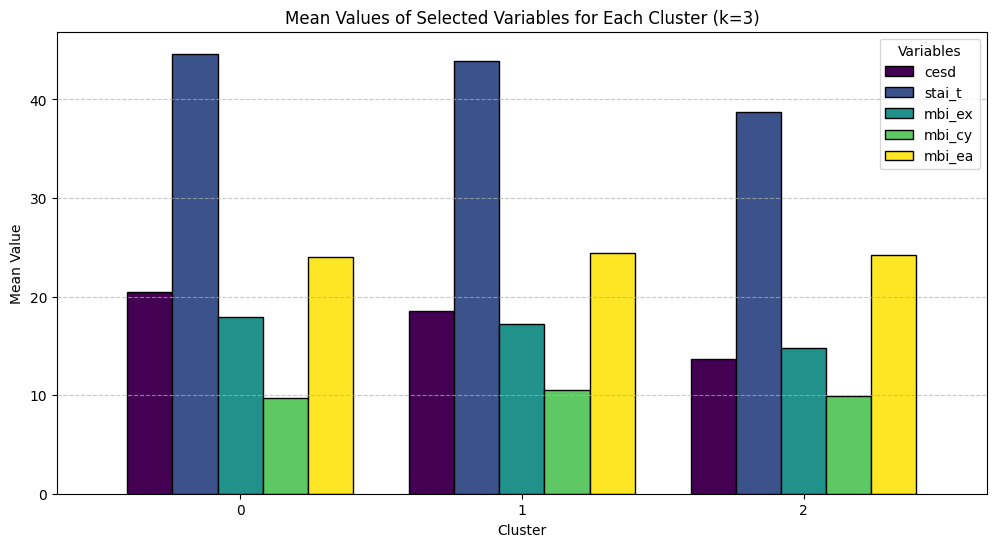

In [108]:
def plot_clusters(df, clusters, k_def):
    df_t = df.copy()
    cats = ['sex', 'year', 'part', 'job', 'psyt', 'health']
    # nums = ['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']
    nums = ['cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']

    for k, clusters, _ in c:
            if k == k_def:
                df_t["Cluster"] = clusters  # Add cluster labels to the DataFrame
                
                means = {}
                for cluster in range(k_def):
                    cluster_data = df_t[df_t["Cluster"] == cluster]
                    means[cluster] = cluster_data[cats].mean()

                means2 = {}
                for cluster in range(k_def):
                    cluster_data = df_t[df_t["Cluster"] == cluster]
                    means2[cluster] = cluster_data[nums].mean()
                
                # Create a DataFrame for mean values
                mean_df_cat = pd.DataFrame(means).T
                mean_df_cat.columns = cats # variables categòriques a mostrar en el gràfic
                mean_df_cat.index.name = 'Cluster'

                # Plot the mean values for each cluster
                plt.figure(figsize=(12, 8))
                mean_df_cat.plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black', width=0.8)
                plt.title(f'Mean Values of Selected Variables for Each Cluster (k={k_def})')
                plt.xlabel('Cluster')
                plt.ylabel('Mean Value')
                plt.xticks(rotation=0)
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                plt.legend(title='Variables')
                plt.show()

                mean_df_num = pd.DataFrame(means2).T
                mean_df_num.columns = nums # Variables numèriques a mostrar en el gràfic
                mean_df_num.index.name = 'Cluster'

                # Plot the mean values for each cluster
                plt.figure(figsize=(12, 8))
                mean_df_num.plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black', width=0.8)
                plt.title(f'Mean Values of Selected Variables for Each Cluster (k={k_def})')
                plt.xlabel('Cluster')
                plt.ylabel('Mean Value')
                plt.xticks(rotation=0)
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                plt.legend(title='Variables')
                plt.show()
                break

plot_clusters(df, c, 3)

Best k according to BIC: 5


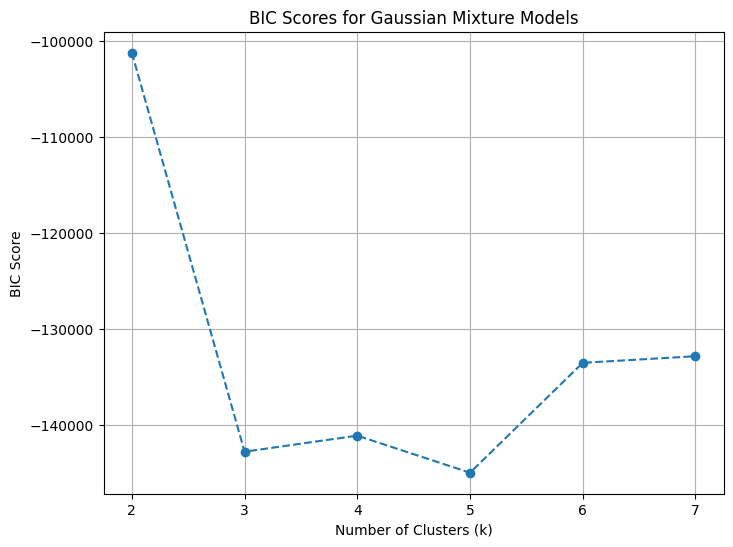

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

def gmm_tsne(dfs, max_k=10):
    df_t = dfs.copy()

    bic_scores = []
    clusterings = []

    best_bic = float('inf')
    best_k = 2

    for k in range(2, max_k + 1):
        gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
        gmm.fit(df_t)
        bic = gmm.bic(df_t)
        bic_scores.append(bic)

        clusters = gmm.predict(df_t)

        if bic < best_bic:
            best_bic = bic
            best_k = k
        
        cluster_centers = gmm.means_
        clusterings.append((k, clusters, cluster_centers))
    
    print(f"Best k according to BIC: {best_k}")

    plt.figure(figsize=(8, 6))
    k_values = range(2, max_k + 1)
    plt.plot(k_values, bic_scores, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('BIC Score')
    plt.title('BIC Scores for Gaussian Mixture Models')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    num_plots = len(clusterings)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols  # Calculate required rows
    
    return clusterings

c2 = gmm_tsne(df_final, 7)

<Figure size 1200x800 with 0 Axes>

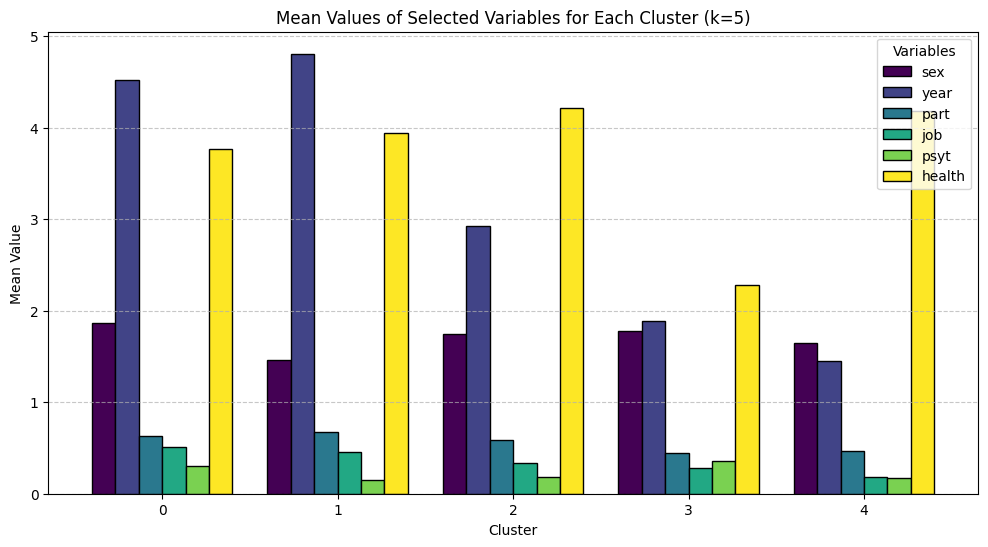

<Figure size 1200x800 with 0 Axes>

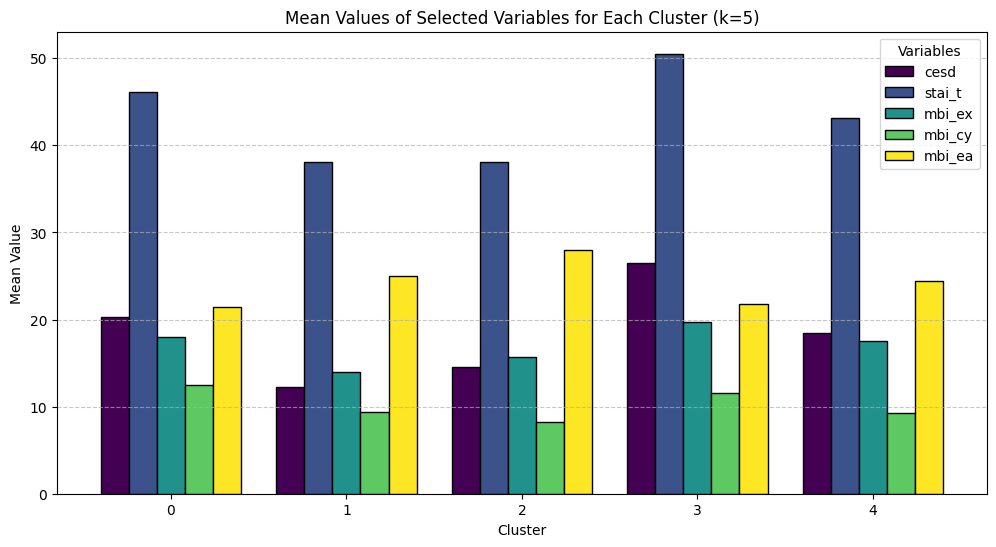

In [112]:
plot_clusters(df, c2, 5)

c:\Users\joanc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joanc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joanc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joanc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `

Best k silhouette: 3


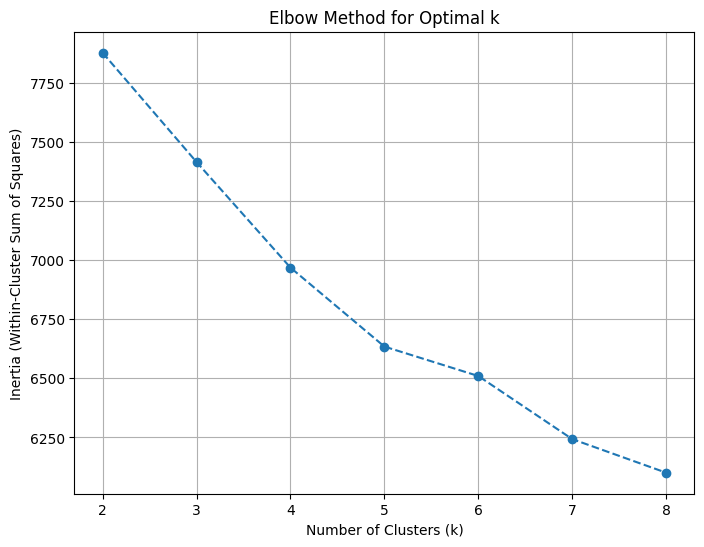

In [118]:
# mini bach kmeans
from sklearn.cluster import MiniBatchKMeans

def mini_batch_kmeans(dfs, max_k=10):
    df_t = dfs.copy()

    # Store inertia values and clustering results for plotting
    inertia = []
    clusterings = []

    sil_best_score = -1
    sil_best_k = 2

    for k in range(2, max_k + 1):
        model = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=int(dfs.shape[0]/2), max_iter=100)
        clusters = model.fit_predict(df_t)
        
        # Silhouette
        if k > 2:
            score = silhouette_score(df_t, clusters)
            if score > sil_best_score:
                sil_best_score = score
                sil_best_k = k
        
        inertia.append(model.inertia_)
        cluster_centers = model.cluster_centers_
        clusterings.append((k, clusters, cluster_centers))

    # Silhouette 
    print("Best k silhouette:", sil_best_k)

    # Plot clustering results for each k, 2 plots per row
    num_plots = len(clusterings)
    num_cols = 2

    plt.figure(figsize=(8, 6))
    k_values = range(2, max_k + 1)
    plt.plot(k_values, inertia, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
    plt.title('Elbow Method for Optimal k')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()
    
    return clusterings
c3 = mini_batch_kmeans(df_final, 8)

<Figure size 1200x800 with 0 Axes>

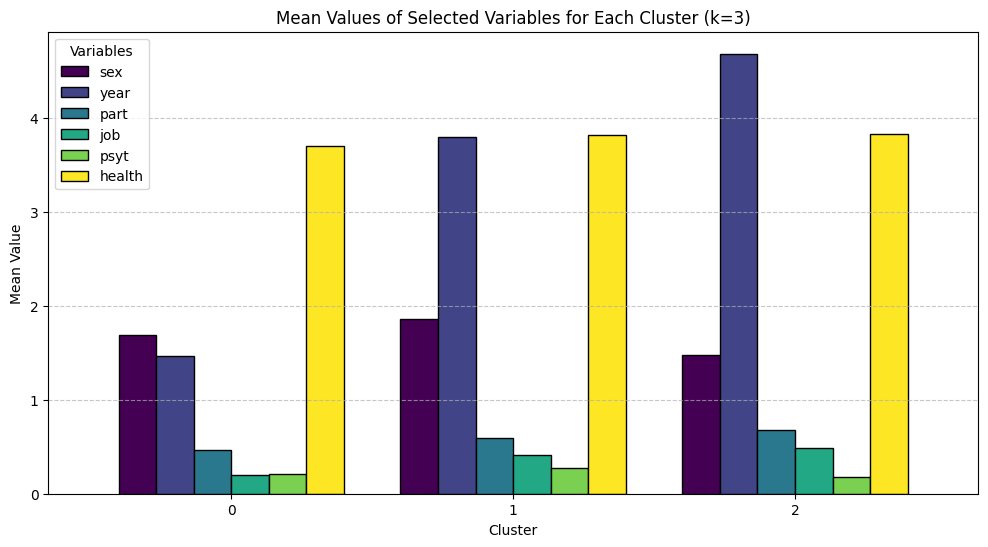

<Figure size 1200x800 with 0 Axes>

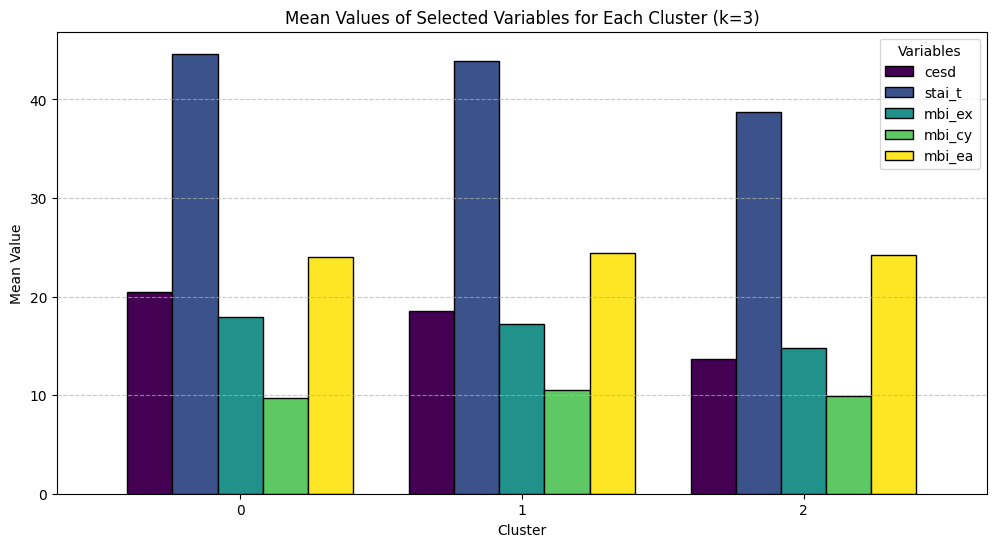

In [119]:
plot_clusters(df, c3, 3)